[1. Central Limit Theorem](#Central Limit Theorem)<br>

[2.Gradient Descent of Linear Regression](#Gradient Descent)<br>
(https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f)
[2.1 Analytical way ](#Analytical way)<br>
[2.2 Gradient Descent](#Gradient Descent)<br>
    [2.2.1 Graph](#graph)<br>
[2.3 Stochastic Gradient Descent](#Stochastic Gradient Descent)<br>
[2.4 Mini Batch Gradient Descent](#Mini Batch Gradient Descent)<br>

[3.KNN](#KNN)

[4.K-means](#K-means)

[5.Naive Bayes](#Naive Bayes)

[6.Logistic Regression](#Logistic Regression)

[7.Random Forest](#Random Forest)


In [2]:
import numpy as np
import pandas as pd
from numpy.random import seed
from numpy.random import randint
from numpy.random import randn


#CLT
seed(1) 
data_sample = randint(50,90,50)
print(np.mean(data_sample))

data_sample_mean = [np.mean(randint(50,90,50)) for _i in range(1000)]
print(np.mean(data_sample_mean))

# linear regression loss function
X= 2*randn(100,1)
y = 4+3*X + randn(100,1)

loss = 1/2*np.mean(np.suqare(y-y_hat))

# logistic regression loss function

loss = -np.mean(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))

# SVM loss function
loss = 1/2*w.T.dot(w)+C*np.sum(error)
# Constraint : y*( X.T.dot(w)+b)>=1-error

# Gradient Descent
def Gradient_Descent(X,y,theta,learning_rate,iteration,tolerance):
    
    count = 0
    error = np.zeros(X.shape[1])
    while count<iteration:
        count += 1
        prediction = X.T.dot(theta)
        theta = theta - 1/len(y)*learning_rate*(X.T.dot(y-prediction))
        cost_history[i] = 1/2*np.mean(np.suqare(y-prediction))
        theta_history[i,:]= theta.T
        
        if np.linalg.norm(theta-error)<tolerance:
            break
        else:
            error = theta
        
    return theta

# Stochastic Gradient Descent
def Stochastic_Gradient_Descent(X,y,theta,learning_rate,iteration,tolerance):
    
    count = 0
    error = np.zeros(X.shape[1])
    while count<iteration:
        count += 1
        
        for i in range(len(y)):
            random_int = randint(0,len(y))
            X_i = X[random_int,:].reshape(1,X.shape[1])
            y_i = y[random_int].reshape(1,1)
            prediction = X_i.T.dot(theta)
            theta = theta - learning_rate*(X_i.T.dot(y_i-prediction))
            
        
        if np.linalg.norm(theta-error)<tolerance:
            break
        else:
            error = theta
        
    return theta

# Mini-batch Gradient Descent
def Minibatch_Gradient_Descent(X,y,theta,learning_rate,iteration,tolerance,batch_size):
    
    count = 0
    error = np.zeros(X.shape[1])
    
    while count<iteration:
        count += 1
        indices = np.random.permutation(len(y))
        X = X[indices]
        y = y[indices]
        
        for i in range(0,len(m),batch_size):
            
            X_i = X[i,i+batch_size]
            y_i = y[i,i+batch_size]
            
            X_i = np._c[np.ones(len(X_i),X_i]
            
            prediction = X_i.T.dot(theta)
            theta = theta - 1/batch_size*learning_rate*(X_i.T.dot(y_i-prediction))

        
        if np.linalg.norm(theta-error)<tolerance:
            break
        else:
            error = theta
        
    return theta
# logistic regression
# prediction = 1/(1+np.exp(-X.T.dot(theta)))
                                
# KNN
def euclidean_distance(row1,row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i]-row2[i])**2
    return np.sqrt(distance)
                                
def get_neighbors(train, test, num_neighbors): 
    distance=[]
    for train_row in train:
        distance.append((train_row,euclidean_distance(test,row)))
    distance.sort(key=lambda distance:distance[1])
    
    neighbors = []
    for i in range(num_neighbors):
        neighbors.append(distance[i][0])
    return neighbors
                                
def predict(train,test,num_neighbors):
    neighbors = get_neighbors(train,test,num_neighbors)
    output_value = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key = output_values.count)
    return prediction
                                
#K-means

Class K_Means():
    def _init_(self, k, iteration, tolerance):
        self.k = k
        self.iteration = iteration
        self.tolerance = tolerance
                
    def fit(self, data):
        self.centroids = {}
        
        # initial centroids
        for i in range(self.k):
            self.centroids[i]=data[i]
        
        #iteration
        for i in range(self.iteration):
            self.classification = {}
                                
            for i in range(self.k):
                self.classification[i]={}
                                
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroidsdat[key]) for key in self.centroids]
                classification = distances.index(min(distances))
                self.classification[classification].append(featureset)
                                
            prev_centroids = dic(self.centroids)
                                
            for classification in self.classification:
                self.centroids[classification]=np.average(self.classification[classification],axis=0)
            
            optimized = True
                                
            for c in range(self.k):
                if np.linalg.norm(prev_centroids[c],self.centroids[c])>tolerance:
                    optimized = False
            
            if optimized:
                break
                                
# Naive Bayes
def separated_by_class(dataset):
                                
    separated={}
    for data in dataset:
        class_value = data[-1]
        if class_value not in separated:
            separated[class_value]=[]
        separated[class_value].append(data)
                                
    return separated
                                
def stdev(numbers):
    avg = np.mean(numbers)
    variance = np.sum((x-avg)**2 for x in numbers) / float(len(numbers)-1)
    return np.sqrt(variance)
                                
def data_summary(dataset):
    summary = [(np.mean(column),stdev(column),len(column)) for column in zip(*dataset)]
    del(summary[-1])
    return summary
                                
def summary_by_class(dataset):
    summaries = {} 
    separated_data = separated_by_class(dataset)
    for i in separated_data:
        summaries[i] = data_summary(separated_data[i]) 
    return summaries
                                
def probability(x,mean,stdev):
    a = np.exp(-1/2*((x-mean)/stdev)**2)
    return 1/(np.sqrt(2*pi)*stdev)*a
                                
def class_probability(summary,row):
    total_rows = np.sum(summary[i][0][2] for i in summary)
    probability = {} 
    for key,value in summary.items():
        probability[key] = summary[key][0][2]/total_rows
        for j in range(len(value)):
            probability[key]*=probability(row[j], value[j][0],value[j][1])
    return probability

SyntaxError: invalid syntax (<ipython-input-2-ef1682b9bdb7>, line 89)

<a id='Central Limit Theorem'></a>
#### Central Limit Theorem

In [3]:
# Load packages
import numpy as np
import pandas as pd
from numpy.random import seed
from numpy.random import randint
from numpy.random import randn
from numpy import mean
import matplotlib.pyplot as plt

In [221]:
# seed the random number generator, so that the experiment is #replicable
seed(1)
# generate a sample of men's weights
weights = randint(60, 90, 50)
print(weights)
print('The average weight is {} kg'.format(mean(weights)))

[65 71 72 68 69 71 65 75 60 76 61 72 67 73 88 66 85 78 80 65 78 80 71 88
 70 88 89 74 78 64 83 83 69 77 83 60 82 73 69 69 67 89 82 85 61 60 88 77
 68 84]
The average weight is 74.32 kg


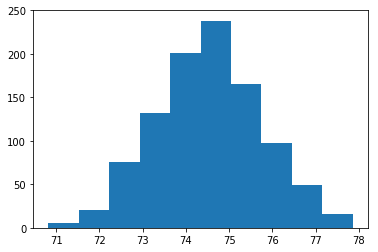

The mean of the sample means is 74.54001999999998


In [6]:
seed(1)
# calculate the mean of 50 men's weights 1000 times
means = [mean(randint(60, 90, 50)) for _i in range(1000)]
# plot the distribution of sample means
plt.hist(means)
plt.show()
print('The mean of the sample means is {}'.format(mean(means)))

<a id='Gradient Descent'></a>
### Gradient Descent of Linear Regression

In [226]:
X = 2*np.random.rand(100,1)
Y = 4 + 3*X + np.random.randn(100,1)

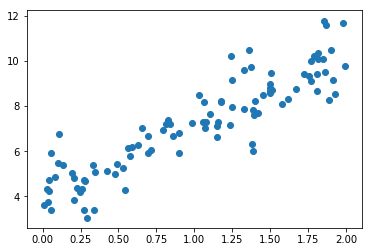

In [227]:
plt.scatter(X,Y)

<a id='Analytical way'></a>
#### Analytical way of Linear Regression

In [228]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
print(theta_best)

[[4.0668607 ]
 [3.10701924]]


In [229]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.0668607 ],
       [10.28089917]])

[0, 2, 0, 15]

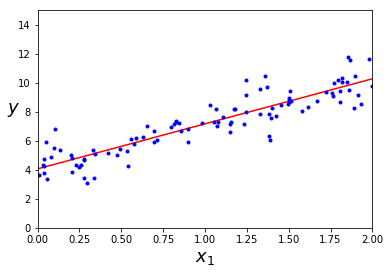

In [230]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,Y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])

<a id='Gradient Descent'></a>
#### Gradient Descent

In [231]:
# Cost Function
def cal_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m)*np.sum(np.square(y-predictions))
    return cost

In [232]:
# Gradient Descent
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for i in range(iterations):
        prediction = np.dot(X,theta)
        
        theta = theta-(1/m)*learning_rate*(X.T.dot((prediction-y)))
        theta_history[i,:]=theta.T
        cost_history[i]=cal_cost(theta,X,y)
        
    return theta,cost_history,theta_history

In [233]:
seed(1)
lr=0.01
n_iter = 200

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]

theta,cost_history,theta_history = gradient_descent(X_b,Y,theta,lr,n_iter)


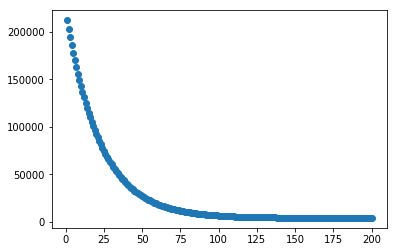

In [234]:
plt.scatter(list(range(1, 201)),cost_history)

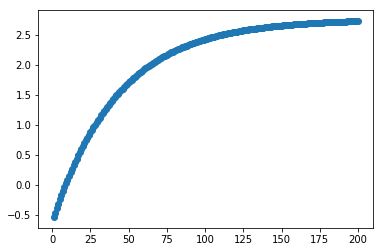

In [49]:
plt.scatter(list(range(1, 201)),theta_history[:,1])

<a id='graph'></a>

In [67]:
#build a function which can show the effects together and also show how gradient decent actually is working
def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

     """
     _ = ax.plot(X,Y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,Y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')

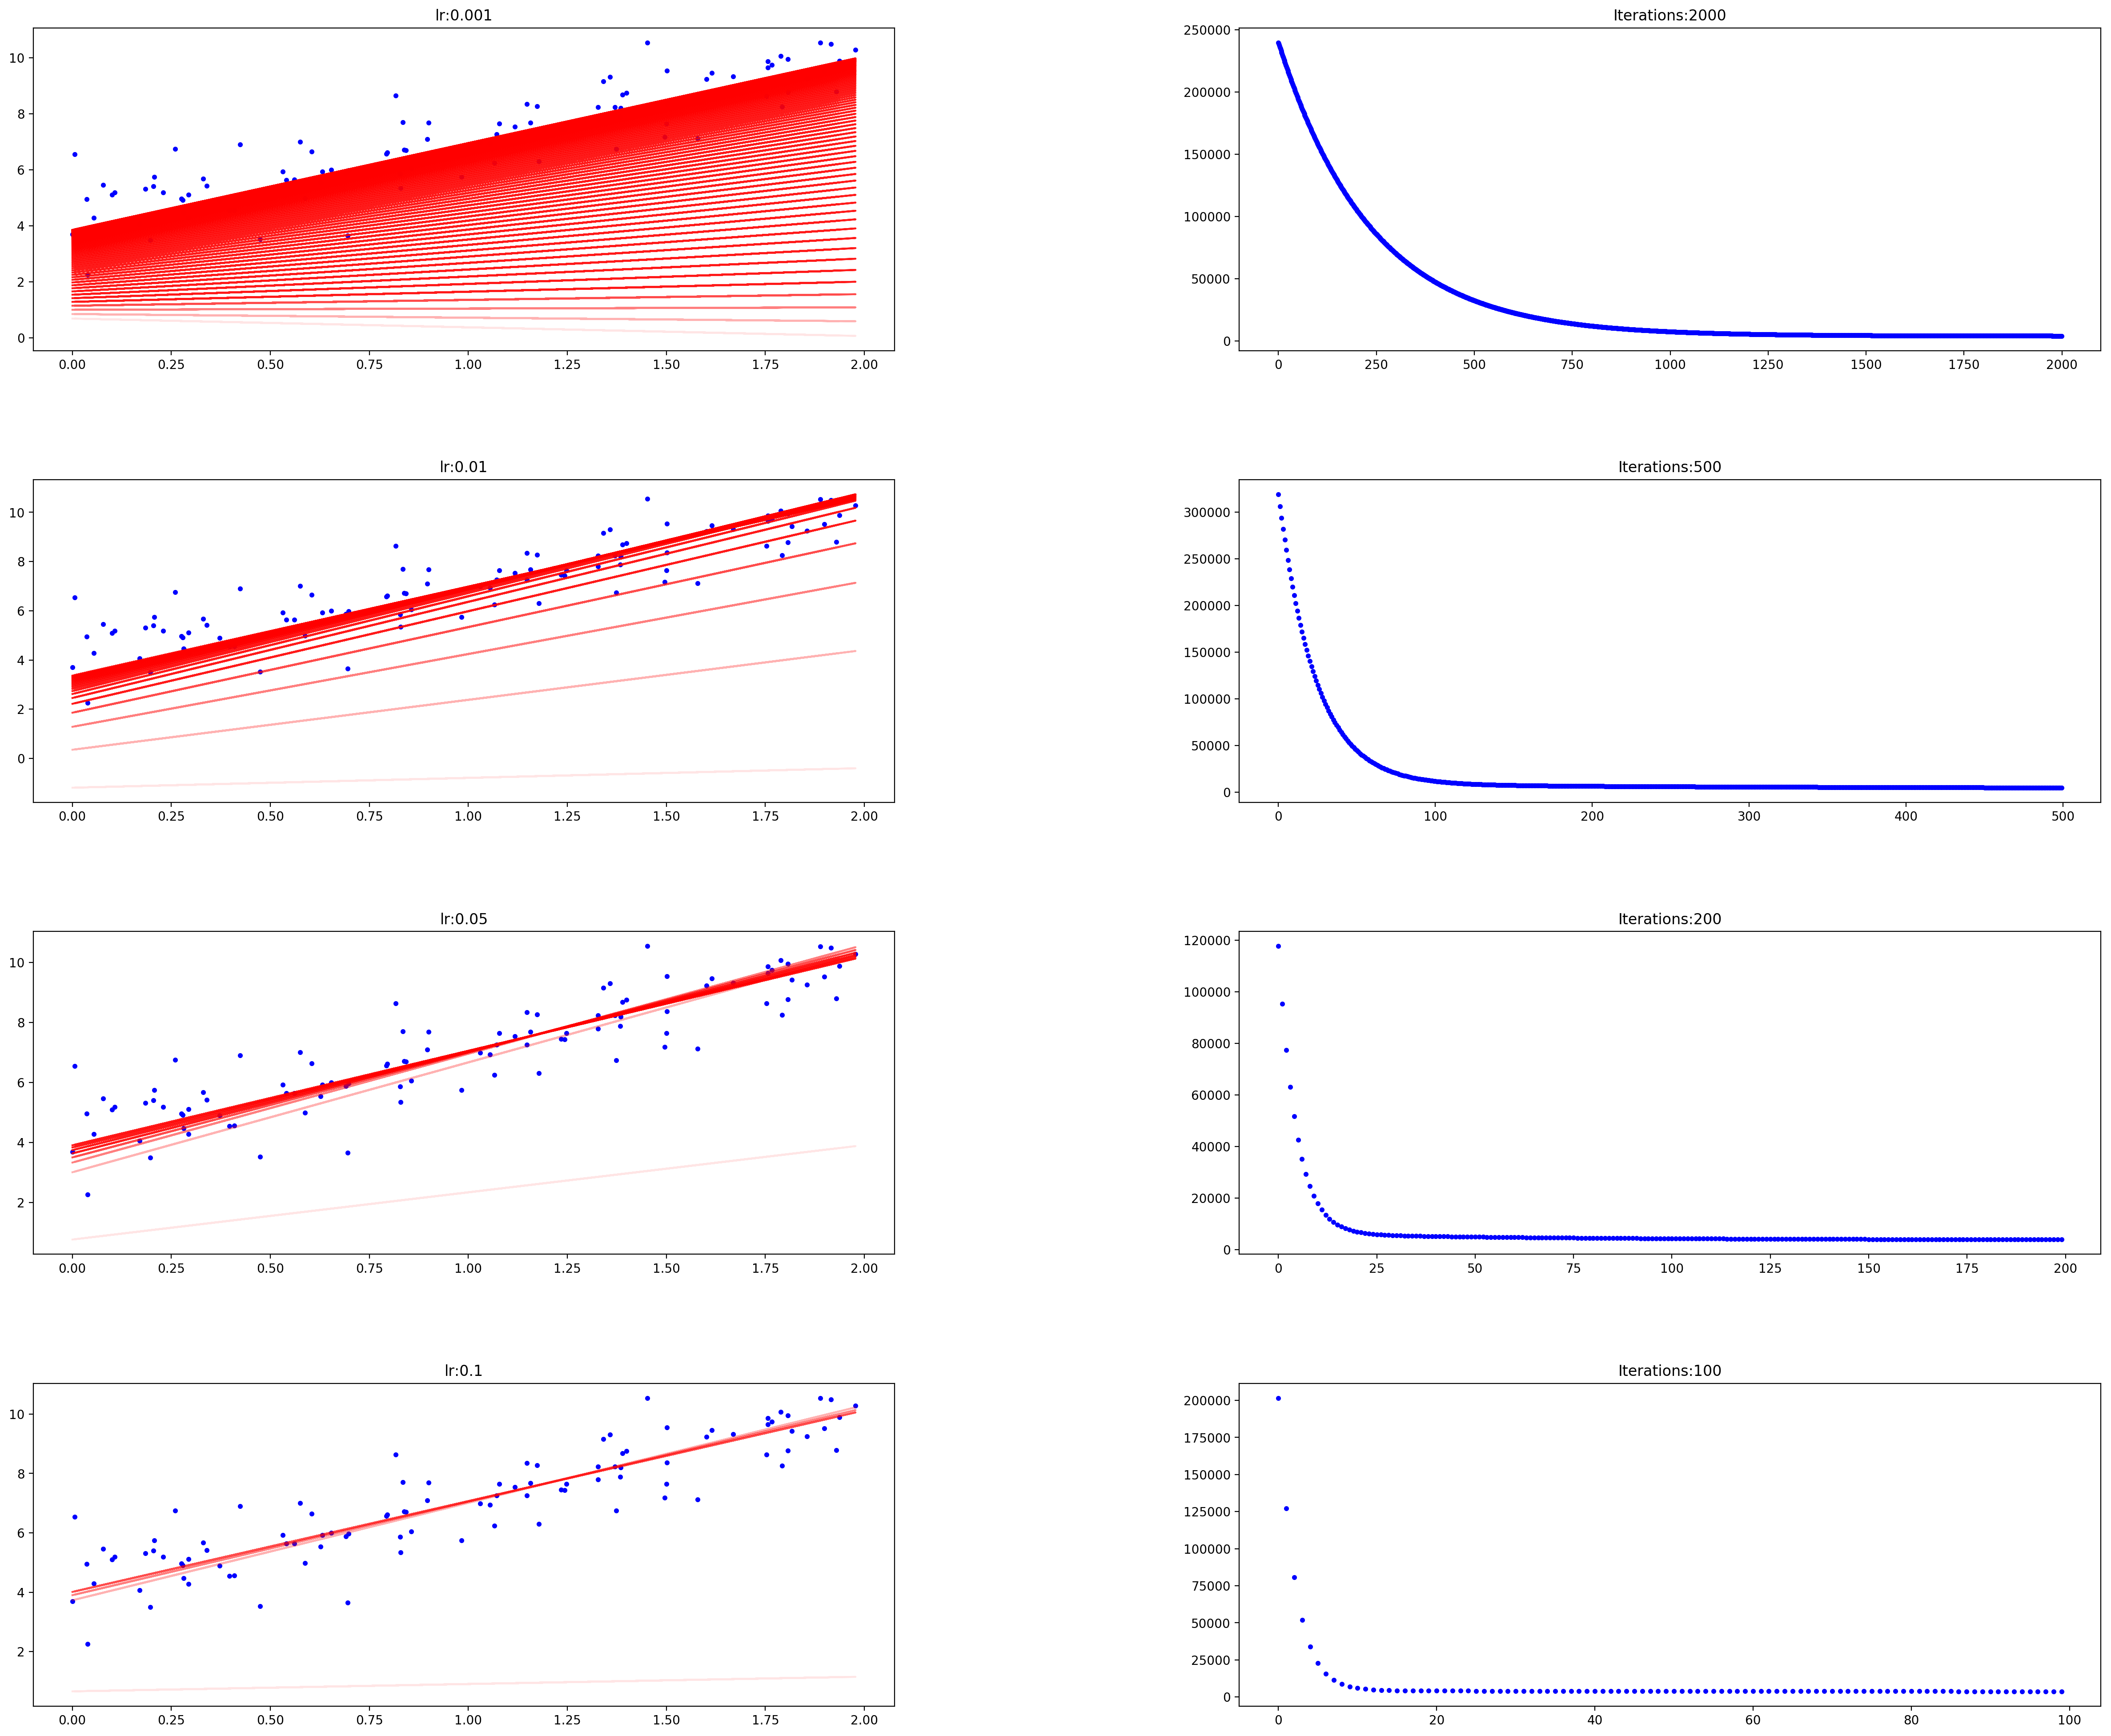

In [68]:
#Plot the graphs for different iterations and learning rates combination
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)


<a id='Stochastic Gradient Descent'></a>
#### Stochastic Gradient Descent

In [81]:
def stochastic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        cost = 0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)
        
            theta = theta-(1/m)*learning_rate*(X_i.T.dot((prediction-y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[i] = cost
        
    return theta,cost_history

In [82]:
seed(1)
lr=0.01
n_iter = 200

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]

theta,cost_history = stochastic_gradient_descent(X_b,Y,theta,lr,n_iter)

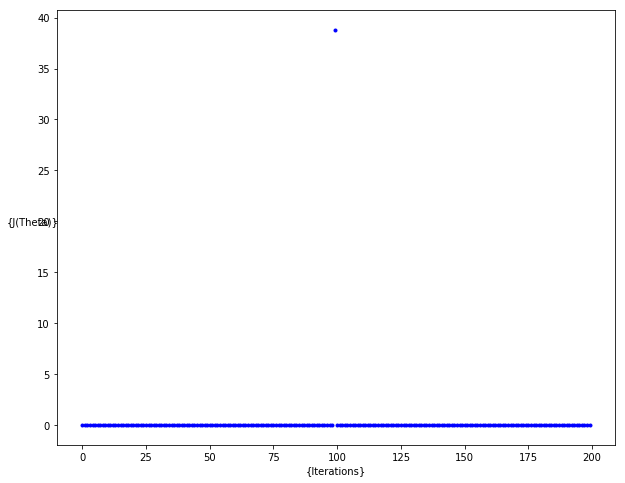

In [83]:
ig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

<a id='Mini Batch Gradient Descent'></a>
#### Mini Batch Gradient Descent

In [84]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for i in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[i]  = cost
        
    return theta, cost_history

In [86]:
n_iter = 200

theta = np.random.randn(2,1)


theta,cost_history = minibatch_gradient_descent(X,Y,theta,lr,n_iter)

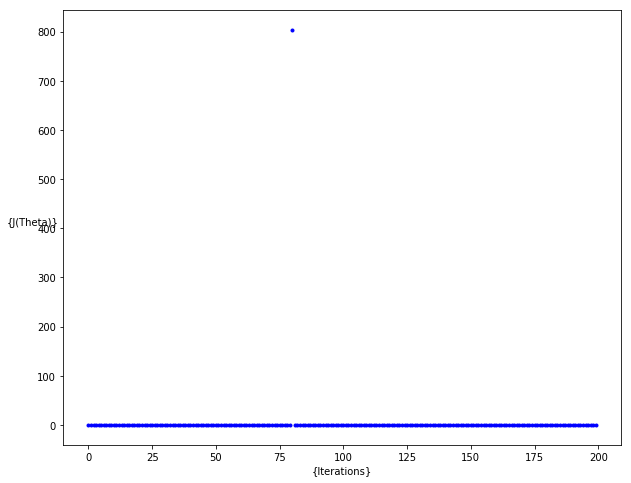

In [87]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

<a id='KNN'></a>
#### KNN
Step 1: Calculate Euclidean Distance.
Step 2: Get Nearest Neighbors.
Step 3: Make Predictions.

In [133]:
# square root of the sum of the squared
# assumes that the last column in each row is an output value which is ignored from the distance calculation
from math import sqrt
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [159]:
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
row0 = dataset[0]
for row in dataset:
	distance = euclidean_distance(row0, row)
	print(distance)

0.0
1.3290173915275787
1.9494646655653247
1.5591439385540549
0.5356280721938492
4.850940186986411
2.592833759950511
4.214227042632867
6.522409988228337
4.985585382449795


In [152]:
# Get Nearest Neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda distances: distances[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

In [160]:
# Test distance function
dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]
neighbors = get_neighbors(dataset, dataset[0], 3)
for neighbor in neighbors:
    print(neighbor)

[2.7810836, 2.550537003, 0]
[3.06407232, 3.005305973, 0]
[1.465489372, 2.362125076, 0]


In [163]:
output_values = [row[-1] for row in neighbors]
output_values.count

<function list.count>

In [ ]:
# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction


<a id='K-means'></a>
#### K-Means
Step 1: Calculate Euclidean Distance.<br>
Step 2: Re-calculating the centroids<br>
Step 3: Stop the iteration: Stop the algorithm when the difference between the old and the new centroids is negligible.

In [168]:
class K_Means:

	def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
		self.k = k
		self.tolerance = tolerance
		self.max_iterations = max_iterations

In [169]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [ ]:
#initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {} # dic for k and corresponding values

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

<a id='Naive Bayes'></a>
#### Naive Bayes
Step 1: Separate By Class.<br>
Step 2: Summarize Dataset.<br>
Step 3: Summarize Data By Class.<br>
Step 4: Gaussian Probability Density Function.<br>
Step 5: Class Probabilities.<br>

In [176]:
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

In [249]:
dataset = [[3.393533211,2.331273381,0],
	[3.110073483,1.781539638,0],
	[1.343808831,3.368360954,0],
	[3.582294042,4.67917911,0],
	[2.280362439,2.866990263,0],
	[7.423436942,4.696522875,1],
	[5.745051997,3.533989803,1],
	[9.172168622,2.511101045,1],
	[7.792783481,3.424088941,1],
	[7.939820817,0.791637231,1]]

In [194]:
# Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)
def summarize_dataset(dataset):
	summaries = [(np.mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	del(summaries[-1])
	return summaries

In [195]:
summary = summarize_dataset(dataset)
print(summary)

[(5.178333386499999, 2.7665845055177263, 10), (2.9984683241, 1.218556343617447, 10)]


In [196]:
# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
	separated = separate_by_class(dataset)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries

In [205]:
# Calculate the Gaussian probability distribution function for x
from math import sqrt
from math import pi
from math import exp
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent

In [207]:

# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
	total_rows = sum([summaries[label][0][2] for label in summaries])
	probabilities = dict()
	for class_value, class_summaries in summaries.items():
		probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
		for i in range(len(class_summaries)):
			mean, stdev, count = class_summaries[i]
			probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
	return probabilities


In [208]:
summaries = summarize_by_class(dataset)
probabilities = calculate_class_probabilities(summaries, dataset[0])
print(probabilities)

{0: 0.05032427673372075, 1: 0.00011557718379945765}


<a id='Logistic Regression'></a>
#### Logistic Regression

In [ ]:
# Prediction
def sigmoid(X, theta):
    z = np.dot(X, theta.T)
    return 1.0 / (1 + np.exp(-z))

In [ ]:
# Loss Function
def logistic_loss(y,y_hat):
    loss = -np.mean(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))
    return loss

In [ ]:
# Gradient Descent
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for i in range(iterations):
        prediction = sigmoid(X, theta)
        
        theta = theta-(1/m)*learning_rate*(X.T.dot((prediction-y)))
        theta_history[i,:]=theta.T
        cost_history[i]=cal_cost(theta,X,y)
        
    return theta,cost_history,theta_history


In [ ]:
def decision_boundary(prob):
    return 1 if prob >= .5 else 0

In [ ]:
seed(1)
lr=0.01
n_iter = 200

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]

theta,cost_history,theta_history = gradient_descent(X_b,Y,theta,lr,n_iter)

<a id='Random Forest'></a>
#### Random Forest

In [ ]:
class RandomForest():
    def __init__(self, x, y, n_trees, n_features, sample_sz, depth=10, min_leaf=5):
        np.random.seed(12)
        if n_features == 'sqrt':
            self.n_features = int(np.sqrt(x.shape[1]))
        elif n_features == 'log2':
            self.n_features = int(np.log2(x.shape[1]))
        else:
            self.n_features = n_features
        print(self.n_features, "sha: ",x.shape[1])    
        self.x, self.y, self.sample_sz, self.depth, self.min_leaf  = x, y, sample_sz, depth, min_leaf
        self.trees = [self.create_tree() for i in range(n_trees)]

    def create_tree(self):
        idxs = np.random.permutation(len(self.y))[:self.sample_sz]
        f_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        return DecisionTree(self.x.iloc[idxs], self.y[idxs], self.n_features, f_idxs,
                    idxs=np.array(range(self.sample_sz)),depth = self.depth, min_leaf=self.min_leaf)
        
    def predict(self, x):
        return np.mean([t.predict(x) for t in self.trees], axis=0)

def std_agg(cnt, s1, s2): return math.sqrt((s2/cnt) - (s1/cnt)**2)

In [ ]:
class DecisionTree():
    def __init__(self, x, y, n_features, f_idxs,idxs,depth=10, min_leaf=5):
        self.x, self.y, self.idxs, self.min_leaf, self.f_idxs = x, y, idxs, min_leaf, f_idxs
        self.depth = depth
        self.n_features = n_features
        self.n, self.c = len(idxs), x.shape[1]
        self.val = np.mean(y[idxs])#holds the prediction for each node of the tree
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        #Will make it recursive later
        for i in self.f_idxs: self.find_better_split(i)
       

    def find_better_split(self, var_idx):
        #Lets write it later
        pass
    

        for i in range(0,self.n-self.min_leaf-1):
            xi,yi = sort_x[i],sort_y[i]
            lhs_cnt += 1; rhs_cnt -= 1
            lhs_sum += yi; rhs_sum -= yi
            lhs_sum2 += yi**2; rhs_sum2 -= yi**2
            if i<self.min_leaf or xi==sort_x[i+1]:
                continue

            lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
            rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
            curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
            if curr_score<self.score: 
                self.var_idx,self.score,self.split = var_idx,curr_score,xi

    @property
    def split_name(self): return self.x.columns[self.var_idx]
    
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]

    @property
    def is_leaf(self): return self.score == float('inf') or self.depth <= 0 
    

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        t = self.lhs if xi[self.var_idx]<=self.split else self.rhs
        return t.predict_row(xi)

In [ ]:
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
	left, right = list(), list()
	for row in dataset:
		if row[index] < value:
			left.append(row)
		else:
			right.append(row)
	return left, right
 
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
	# count all samples at split point
	n_instances = float(sum([len(group) for group in groups]))
	# sum weighted Gini index for each group
	gini = 0.0
	for group in groups:
		size = float(len(group))
		# avoid divide by zero
		if size == 0:
			continue
		score = 0.0
		# score the group based on the score for each class
		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			score += p * p
		# weight the group score by its relative size
		gini += (1.0 - score) * (size / n_instances)
	return gini
 
# Select the best split point for a dataset
def get_split(dataset, n_features):
	class_values = list(set(row[-1] for row in dataset))
	b_index, b_value, b_score, b_groups = 999, 999, 999, None
	features = list()
	while len(features) < n_features:
		index = randrange(len(dataset[0])-1)
		if index not in features:
			features.append(index)
	for index in features:
		for row in dataset:
			groups = test_split(index, row[index], dataset)
			gini = gini_index(groups, class_values)
			if gini < b_score:
				b_index, b_value, b_score, b_groups = index, row[index], gini, groups
	return {'index':b_index, 'value':b_value, 'groups':b_groups}
 

In [21]:
import random
def string_to_int (column,dataset):
    column_uniq = set([row[column] for row in np.array(dataset)])
    lookup ={}
    new_dataset = []
    for i,value in enumerate(column_uniq):
        lookup[value]=i
    for row in np.array(dataset):
        row[column]= lookup[row[column]]
        new_dataset.append(row)
    return new_dataset,lookup



,0
0,1
1,2
2,2
3,1
4,1
5,0
6,1
7,1
8,2
9,1


### Switch IV with DV

In [5]:
# Load packages
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd
from numpy.random import seed
from numpy.random import randint
from numpy.random import randn
from numpy import mean
import matplotlib.pyplot as plt

In [30]:
X= randn(100,1)
y = X + randn(100,1)

In [34]:
LR1 = LinearRegression(fit_intercept=True)
LR1.fit(y, X)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
LR1.coef_

array([[0.48619023]])

In [36]:
LR1.intercept_

array([-0.13611702])